<a href="https://colab.research.google.com/github/Granthan1994/Measuring-Crime-Concentration-Near-MBTA-Stations-Boston/blob/main/Fei_Han_820_Project_M2_Pet_Cats_in_the_UK_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#820 Project M2 Pet Cats in the UK Q4

**Section B Team 12**

**Fei Han**

##Problem Statement and Analytic Focus

**Question**:

When cats are grouped based on similarity in their overall living habits—such as activity regularity, spatial concentration around the home area, and consistency of daily behavior—do distinct behavioral profiles emerge, and how do different feeding types (for example, reliance on owner-provided food versus access to hunting) distribute across these naturally occurring groups?

**Explaination(refined)**

After the initial EDA, the team identified several interesting patterns that helped refine the research question and sharpen the analytical focus. While the initial assumption treated feeding type as a primary driver of behavioral differentiation among cats, the exploratory analysis revealed that most cats consume a mixed diet of dry and wet food, with relatively few relying exclusively on a single food type. This distribution suggests limited variation in feeding behavior across the dataset, making it difficult for unsupervised clustering methods to distinguish meaningful behavioral groups based solely on feeding type

**Analytical Insights**

This imbalance suggests that feeding type may not directly form distinct clusters on its own. After running several preliminary tests, feeding type appears to function more as a secondary differentiating factor across clusters rather than a primary driver of cluster formation.

**Significance:**

the statistical significance remained unchanged which means the distribution of feeding types still remains highly important for stakeholders. For animal control agencies and wildlife policymakers, these insights may help inform strategies for managing free-roaming cat populations and mitigating ecological impacts, particularly in areas where hunting behavior poses risks to biodiversity.

##EDA Update

**Data Import and preprocesssing**

In [ ]:
import pandas as pd
import numpy as np

cats_gps_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-31/cats_uk.csv"
cats_meta_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-01-31/cats_uk_reference.csv"
cats_gps = pd.read_csv(cats_gps_url)
cats_meta = pd.read_csv(cats_meta_url)
print("GPS dataset shape:", cats_gps.shape)
print("Metadata dataset shape:", cats_meta.shape)

cats_gps.head(), cats_meta.head()

GPS dataset shape: (18215, 11)
Metadata dataset shape: (101, 16)


(  tag_id    event_id  visible             timestamp  location_long  \
 0   Ares  3395610551     True  2017-06-24T01:03:57Z      -5.113851   
 1   Ares  3395610552     True  2017-06-24T01:11:20Z      -5.113851   
 2   Ares  3395610553     True  2017-06-24T02:58:16Z      -5.113730   
 3   Ares  3395610554     True  2017-06-24T03:01:26Z      -5.113774   
 4   Ares  3395610555     True  2017-06-24T03:51:58Z      -5.114247   
 
    location_lat  ground_speed  height_above_ellipsoid  \
 0     50.170315           684                  154.67   
 1     50.170315           936                  154.67   
 2     50.169876          2340                   81.35   
 3     50.169827             0                   67.82   
 4     50.170139          4896                  118.03   
 
    algorithm_marked_outlier  manually_marked_outlier               study_name  
 0                     False                    False  Pet Cats United Kingdom  
 1                     False                    False  Pet C

In [ ]:
print(cats_gps.info())
print(cats_meta.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tag_id                    18215 non-null  object 
 1   event_id                  18215 non-null  int64  
 2   visible                   18215 non-null  bool   
 3   timestamp                 18215 non-null  object 
 4   location_long             18215 non-null  float64
 5   location_lat              18215 non-null  float64
 6   ground_speed              18215 non-null  int64  
 7   height_above_ellipsoid    18215 non-null  float64
 8   algorithm_marked_outlier  18215 non-null  bool   
 9   manually_marked_outlier   18215 non-null  bool   
 10  study_name                18215 non-null  object 
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 1.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 colum

In [ ]:
cats_gps[cats_gps['tag_id'].isin(['Ares', 'Wilfred-Tag', 'Lightening Bugg-Tag', 'Jezebel-Tag','Tipsy-Tag','Maggie-Tag','Lily-Tag','Pants-Tag','Neil-Tag','Johnny-Tag','Meg-Tag','Amber-Tag','Charlie3-Tag'])].count()

,0
tag_id,1817
event_id,1817
visible,1817
timestamp,1817
location_long,1817
location_lat,1817
ground_speed,1817
height_above_ellipsoid,1817
algorithm_marked_outlier,1817
manually_marked_outlier,1817


In [ ]:
full_cats_data = cats_gps.merge(
    cats_meta,
    on='tag_id',
    how='left'
)


In [ ]:
cleaned_cats_data = full_cats_data[~full_cats_data['tag_id'].isin(['Ares', 'Wilfred-Tag', 'Lightening Bugg-Tag', 'Jezebel-Tag','Tipsy-Tag','Maggie-Tag','Lily-Tag','Pants-Tag','Neil-Tag','Johnny-Tag','Meg-Tag','Amber-Tag','Charlie3-Tag'])]
cleaned_cats_data = cleaned_cats_data.drop('food_other', axis=1)
cleaned_cats_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16398 entries, 103 to 18214
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tag_id                         16398 non-null  object 
 1   event_id                       16398 non-null  int64  
 2   visible                        16398 non-null  bool   
 3   timestamp                      16398 non-null  object 
 4   location_long                  16398 non-null  float64
 5   location_lat                   16398 non-null  float64
 6   ground_speed                   16398 non-null  int64  
 7   height_above_ellipsoid         16398 non-null  float64
 8   algorithm_marked_outlier       16398 non-null  bool   
 9   manually_marked_outlier        16398 non-null  bool   
 10  study_name                     16398 non-null  object 
 11  animal_id                      16398 non-null  object 
 12  animal_taxon                   16398 non-null  ob

**Analysis:**

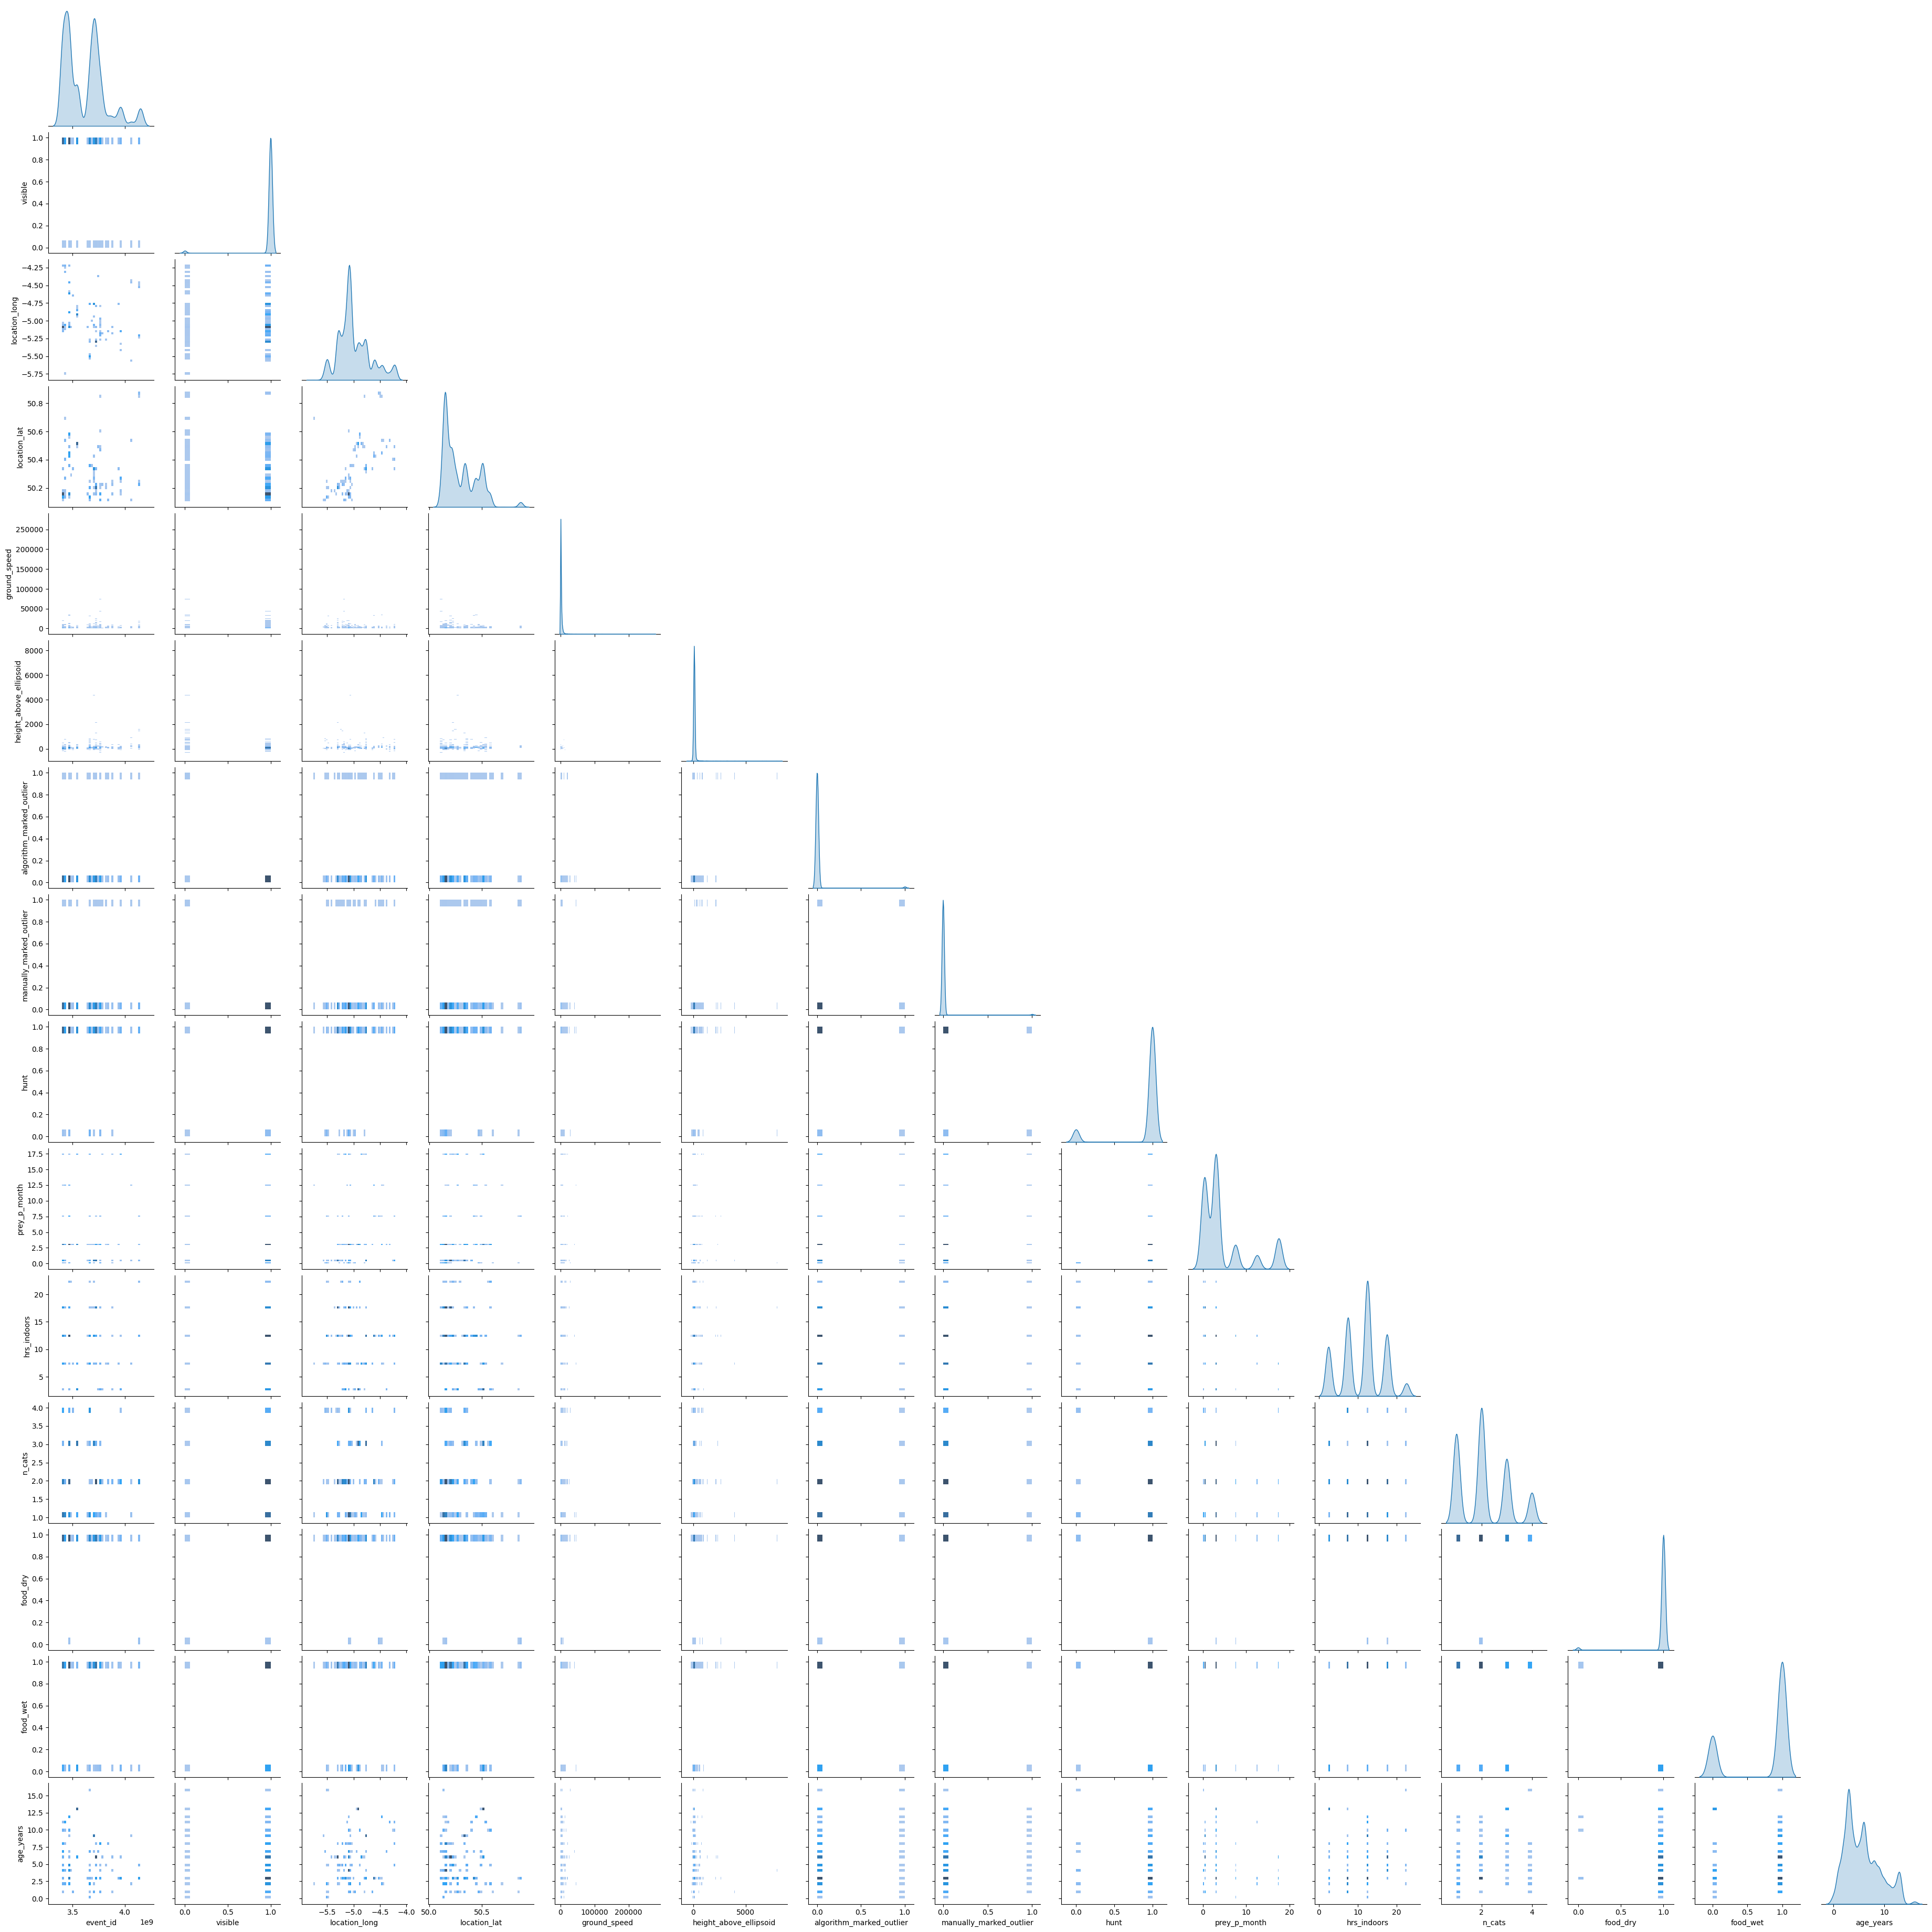

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(cleaned_cats_data, kind="hist", diag_kind="kde", corner=True)
plt.show()

**Insight**


*   The pairplot shows that the most feature do not have a strong pairwise relationship
*   Lots of the points are very close to zero

There is not obvious cluster in pairplot, and may need unsupervised machine learning(k-means) to continue.



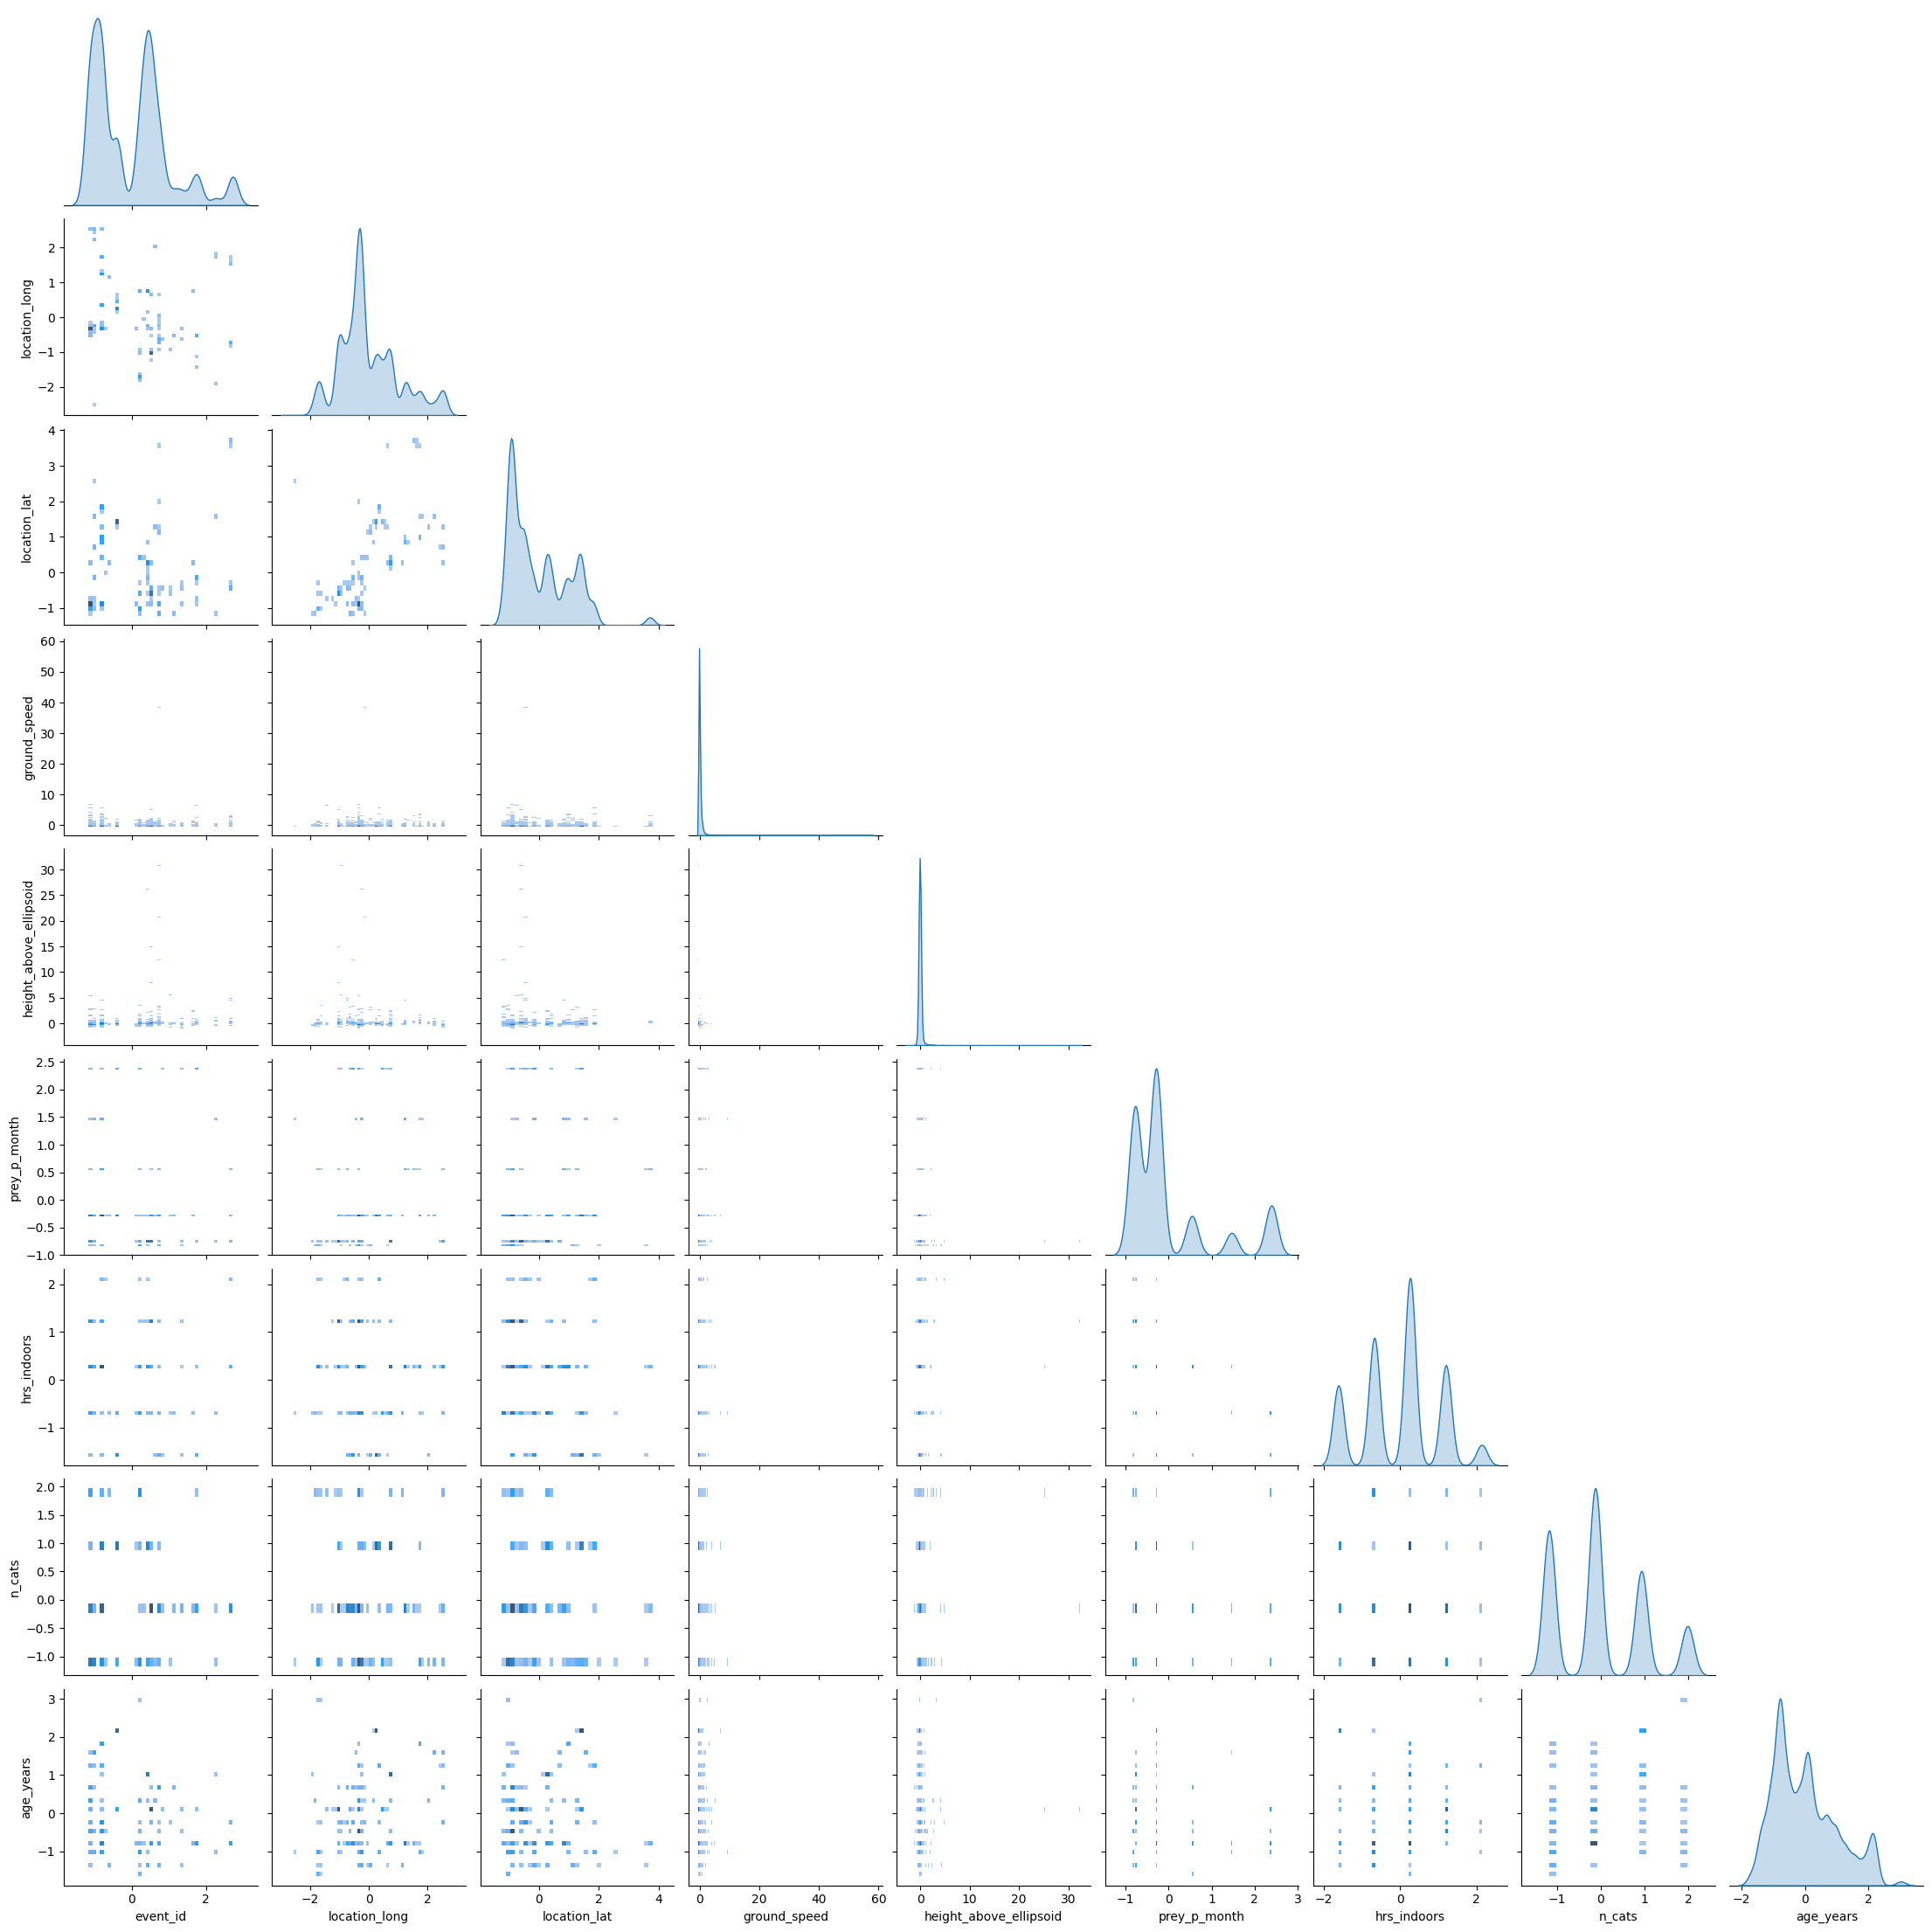

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = cleaned_cats_data.select_dtypes(include='number').columns

X_num = pd.DataFrame(
    StandardScaler().fit_transform(cleaned_cats_data[numeric_cols]),
    columns=numeric_cols
)

sns.pairplot(X_num, kind="hist", diag_kind="kde", corner=True)
plt.show()

After standardizing the variables and addressing outliers, no clearly separable clusters were observed. Although longitude, latitude, and location variables exhibit some apparent clustering behavior, the dataset is confined to a single city, which limits the interpretability of these spatial patterns and prevents them from revealing substantively meaningful behavioral differences.


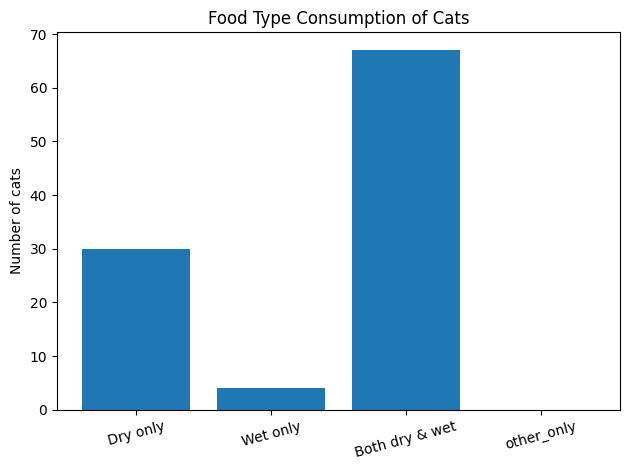

In [ ]:
dry_only = (
    (cats_meta['food_dry'] == True) &
    (cats_meta['food_wet'] == False)
).sum()

wet_only = (
    (cats_meta['food_dry'] == False) &
    (cats_meta['food_wet'] == True)
).sum()

both = (
    (cats_meta['food_dry'] == True) &
    (cats_meta['food_wet'] == True)
).sum()

other_only = (
    (cats_meta['food_dry'] == False) &
    (cats_meta['food_wet'] == False)
).sum()


import matplotlib.pyplot as plt

labels = [
    'Dry only',
    'Wet only',
    'Both dry & wet',
    'other_only'
]

counts = [dry_only, wet_only, both, other_only]

plt.figure()
plt.bar(labels, counts)
plt.ylabel('Number of cats')
plt.title('Food Type Consumption of Cats')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


The table above shows all the cats with missing information (except for 'food_other'). If we remove these cat entries, 1817 rows will be deleted out of a total of 18215 rows, which is approximately 10%. For 'food_other', we plan to delete the entire column. This will not significantly affect our analysis, as no cat eats only 'food_other'.

**Heat map**

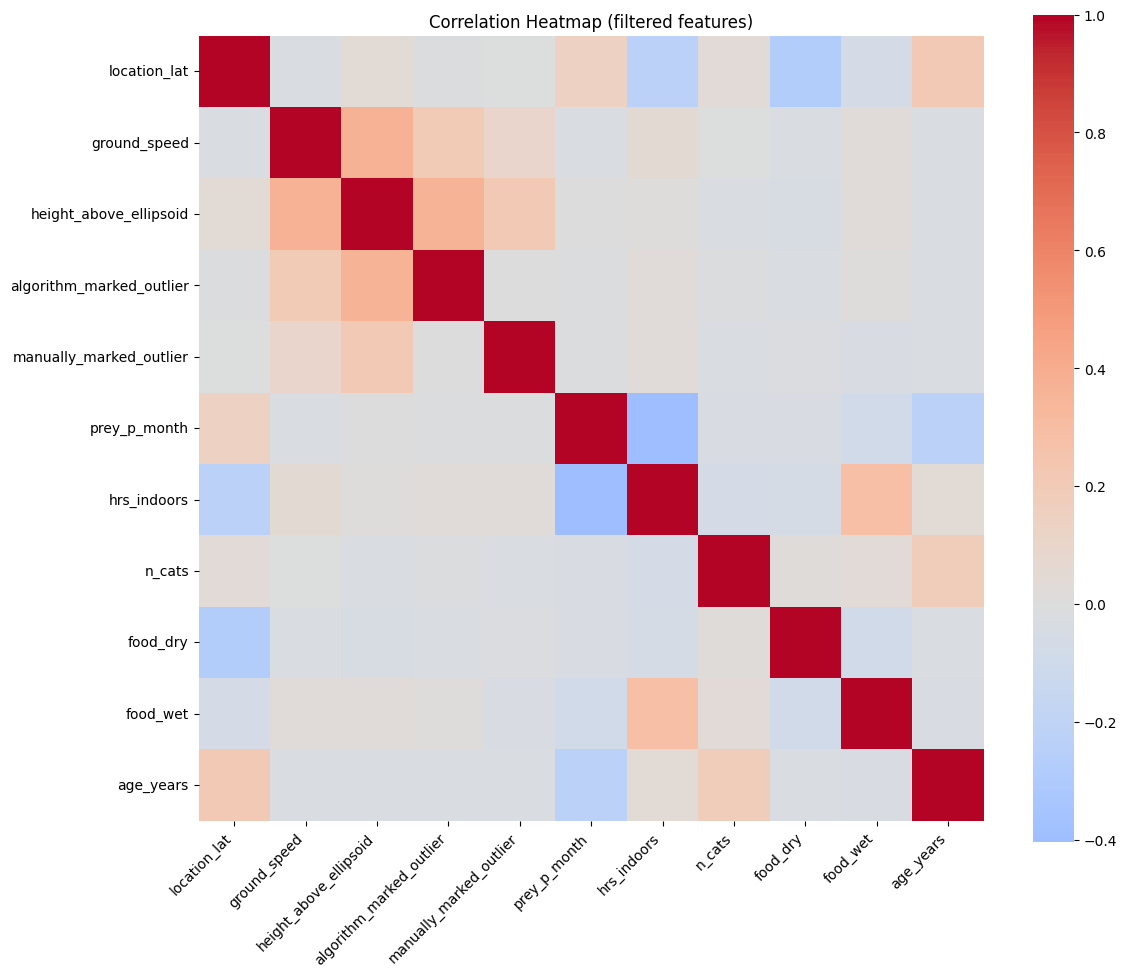

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = cleaned_cats_data.select_dtypes(include=['number', 'bool'])

drop_cols = ['event_id',  'location_long', 'visible']
numeric_df_clean = numeric_df.drop(columns=drop_cols, errors='ignore')

corr = numeric_df_clean.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True, annot=False)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Heatmap (filtered features)")
plt.tight_layout()
plt.show()


As shown in the heatmap, hours spent indoors are slightly positively correlated with wet food consumption, while prey captured per month is negatively correlated with hours spent indoors. These relationships are intuitively plausible, as wet food is less suitable for outdoor storage, and cats must spend time outdoors in order to hunt prey. Additionally, as observed in the earlier EDA, most cats consume a mixed diet rather than relying on a single feeding type. Taken together, these findings suggest that increased reliance on wet food may be associated with more indoor activity and could potentially have a positive effect on biodiversity protection by reducing hunting behavior.

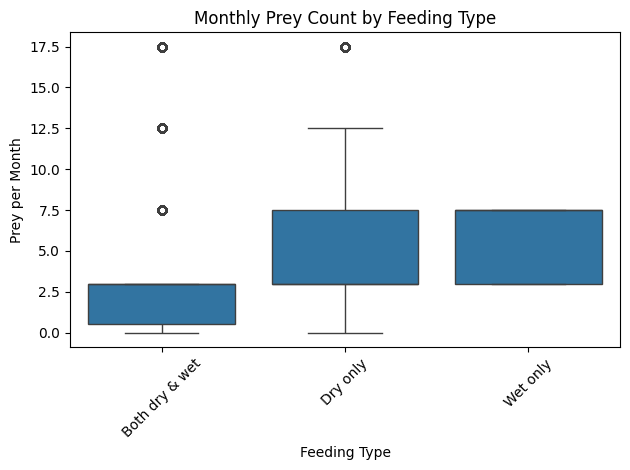

In [ ]:
def get_feeding_type(row):
    if row['food_dry'] and not row['food_wet']:
        return 'Dry only'
    elif not row['food_dry'] and row['food_wet']:
        return 'Wet only'
    elif row['food_dry'] and row['food_wet']:
        return 'Both dry & wet'
    else:
        return 'Other only'


if 'feeding_type' not in cleaned_cats_data.columns:
    cleaned_cats_data['feeding_type'] = cleaned_cats_data.apply(get_feeding_type, axis=1)

sns.boxplot(
    data=cleaned_cats_data,
    x='feeding_type',
    y='prey_p_month'
)
plt.title("Monthly Prey Count by Feeding Type")
plt.xlabel("Feeding Type")
plt.ylabel("Prey per Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As shown in the boxplot, cats fed with both wet and dry food have lower prey captured per month, which is intuitively reasonable. If cats are well fed, they may be less likely to hunt other animals. In contrast, cats fed exclusively on dry food or wet food do not show a clear difference in prey captured per month, which was somewhat surprising.

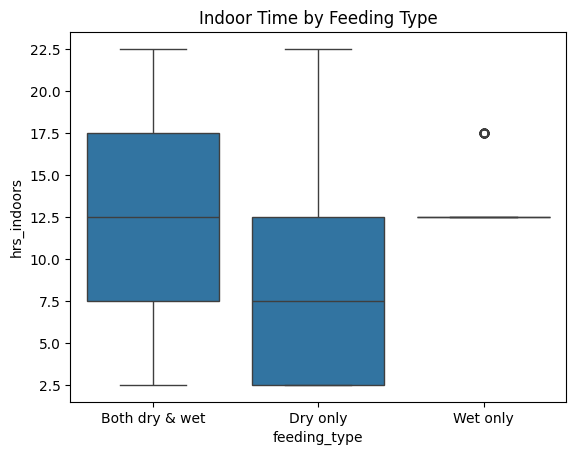

In [ ]:
sns.boxplot(
    data=cleaned_cats_data,
    x='feeding_type',
    y='hrs_indoors'
)
plt.title("Indoor Time by Feeding Type")
plt.show()


dry only have low indoor ours thats why the prey amount is high well, the wet have only 2 variables, but shows longer indoor times. This findings may affect the cluster in later research.

##Analysis & Experiments

###Hierarchical Clustering

standardized numeric data and change the bool to zero and 1 on numeric_df_clean

In [ ]:
numeric_cats = cleaned_cats_data.select_dtypes(include=['number'])
numeric_cats_clean = numeric_cats.drop(columns=drop_cols, errors='ignore')


In [ ]:
print(numeric_cats_clean.head())

     location_lat  ground_speed  height_above_ellipsoid  prey_p_month  \
103     50.170296           360                   78.04           3.0   
104     50.170277           828                   70.43           3.0   
105     50.170177           288                   65.66           3.0   
106     50.170170             0                   75.44           3.0   
107     50.170303           792                   68.41           3.0   

     hrs_indoors  n_cats  age_years  
103          7.5       2        3.0  
104          7.5       2        3.0  
105          7.5       2        3.0  
106          7.5       2        3.0  
107          7.5       2        3.0  


In [ ]:
scaler = StandardScaler()

numeric_cats_scaled = pd.DataFrame(
    scaler.fit_transform(numeric_cats_clean),
    columns=numeric_cats_clean.columns,
    index=numeric_cats_clean.index
)

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

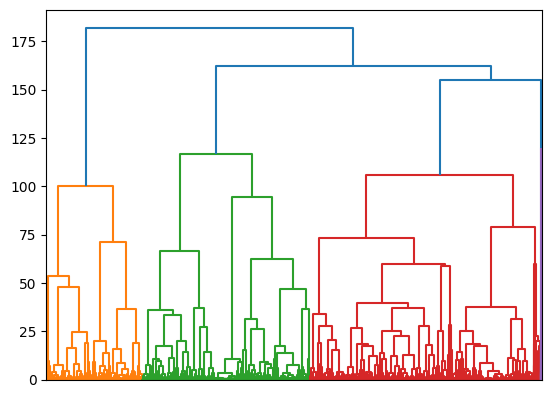

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

Z = linkage(numeric_cats_scaled, 'ward')

_ = dendrogram(Z, no_labels=True)



As shown in the dendrogram, I decided to proceed with three clusters (k = 3). The structure reveals one large red cluster on the right and a smaller distinct green cluster in the middle, along with even smaller orange cluster on the left. The cluster is well seprated k=3 makes a lot of sense in this case.

In [ ]:
n_clusters = 3

numeric_cats_scaled['cluster_labels'] = fcluster(Z, n_clusters, criterion='maxclust').astype(str)

numeric_cats_scaled

,location_lat,ground_speed,height_above_ellipsoid,prey_p_month,hrs_indoors,n_cats,age_years,cluster_labels
103,-0.800665,-0.327234,-0.109152,-0.285997,-0.670513,-0.125306,-0.782973,3
104,-0.800788,-0.228792,-0.138812,-0.285997,-0.670513,-0.125306,-0.782973,3
105,-0.801433,-0.342379,-0.157402,-0.285997,-0.670513,-0.125306,-0.782973,3
106,-0.801478,-0.402959,-0.119286,-0.285997,-0.670513,-0.125306,-0.782973,3
107,-0.800620,-0.236365,-0.146684,-0.285997,-0.670513,-0.125306,-0.782973,3
...,...,...,...,...,...,...,...,...
18210,3.709172,-0.137923,0.150494,0.544821,0.265955,-0.125306,-0.782973,1
18211,3.708972,3.042508,0.119080,0.544821,0.265955,-0.125306,-0.782973,1
18212,3.709933,0.543598,0.214060,0.544821,0.265955,-0.125306,-0.782973,1
18213,3.709636,-0.183357,0.287488,0.544821,0.265955,-0.125306,-0.782973,1


In [ ]:
numeric_cats_scaled['cluster_labels'].value_counts()

,count
cluster_labels,
3,7658
2,5546
1,3194


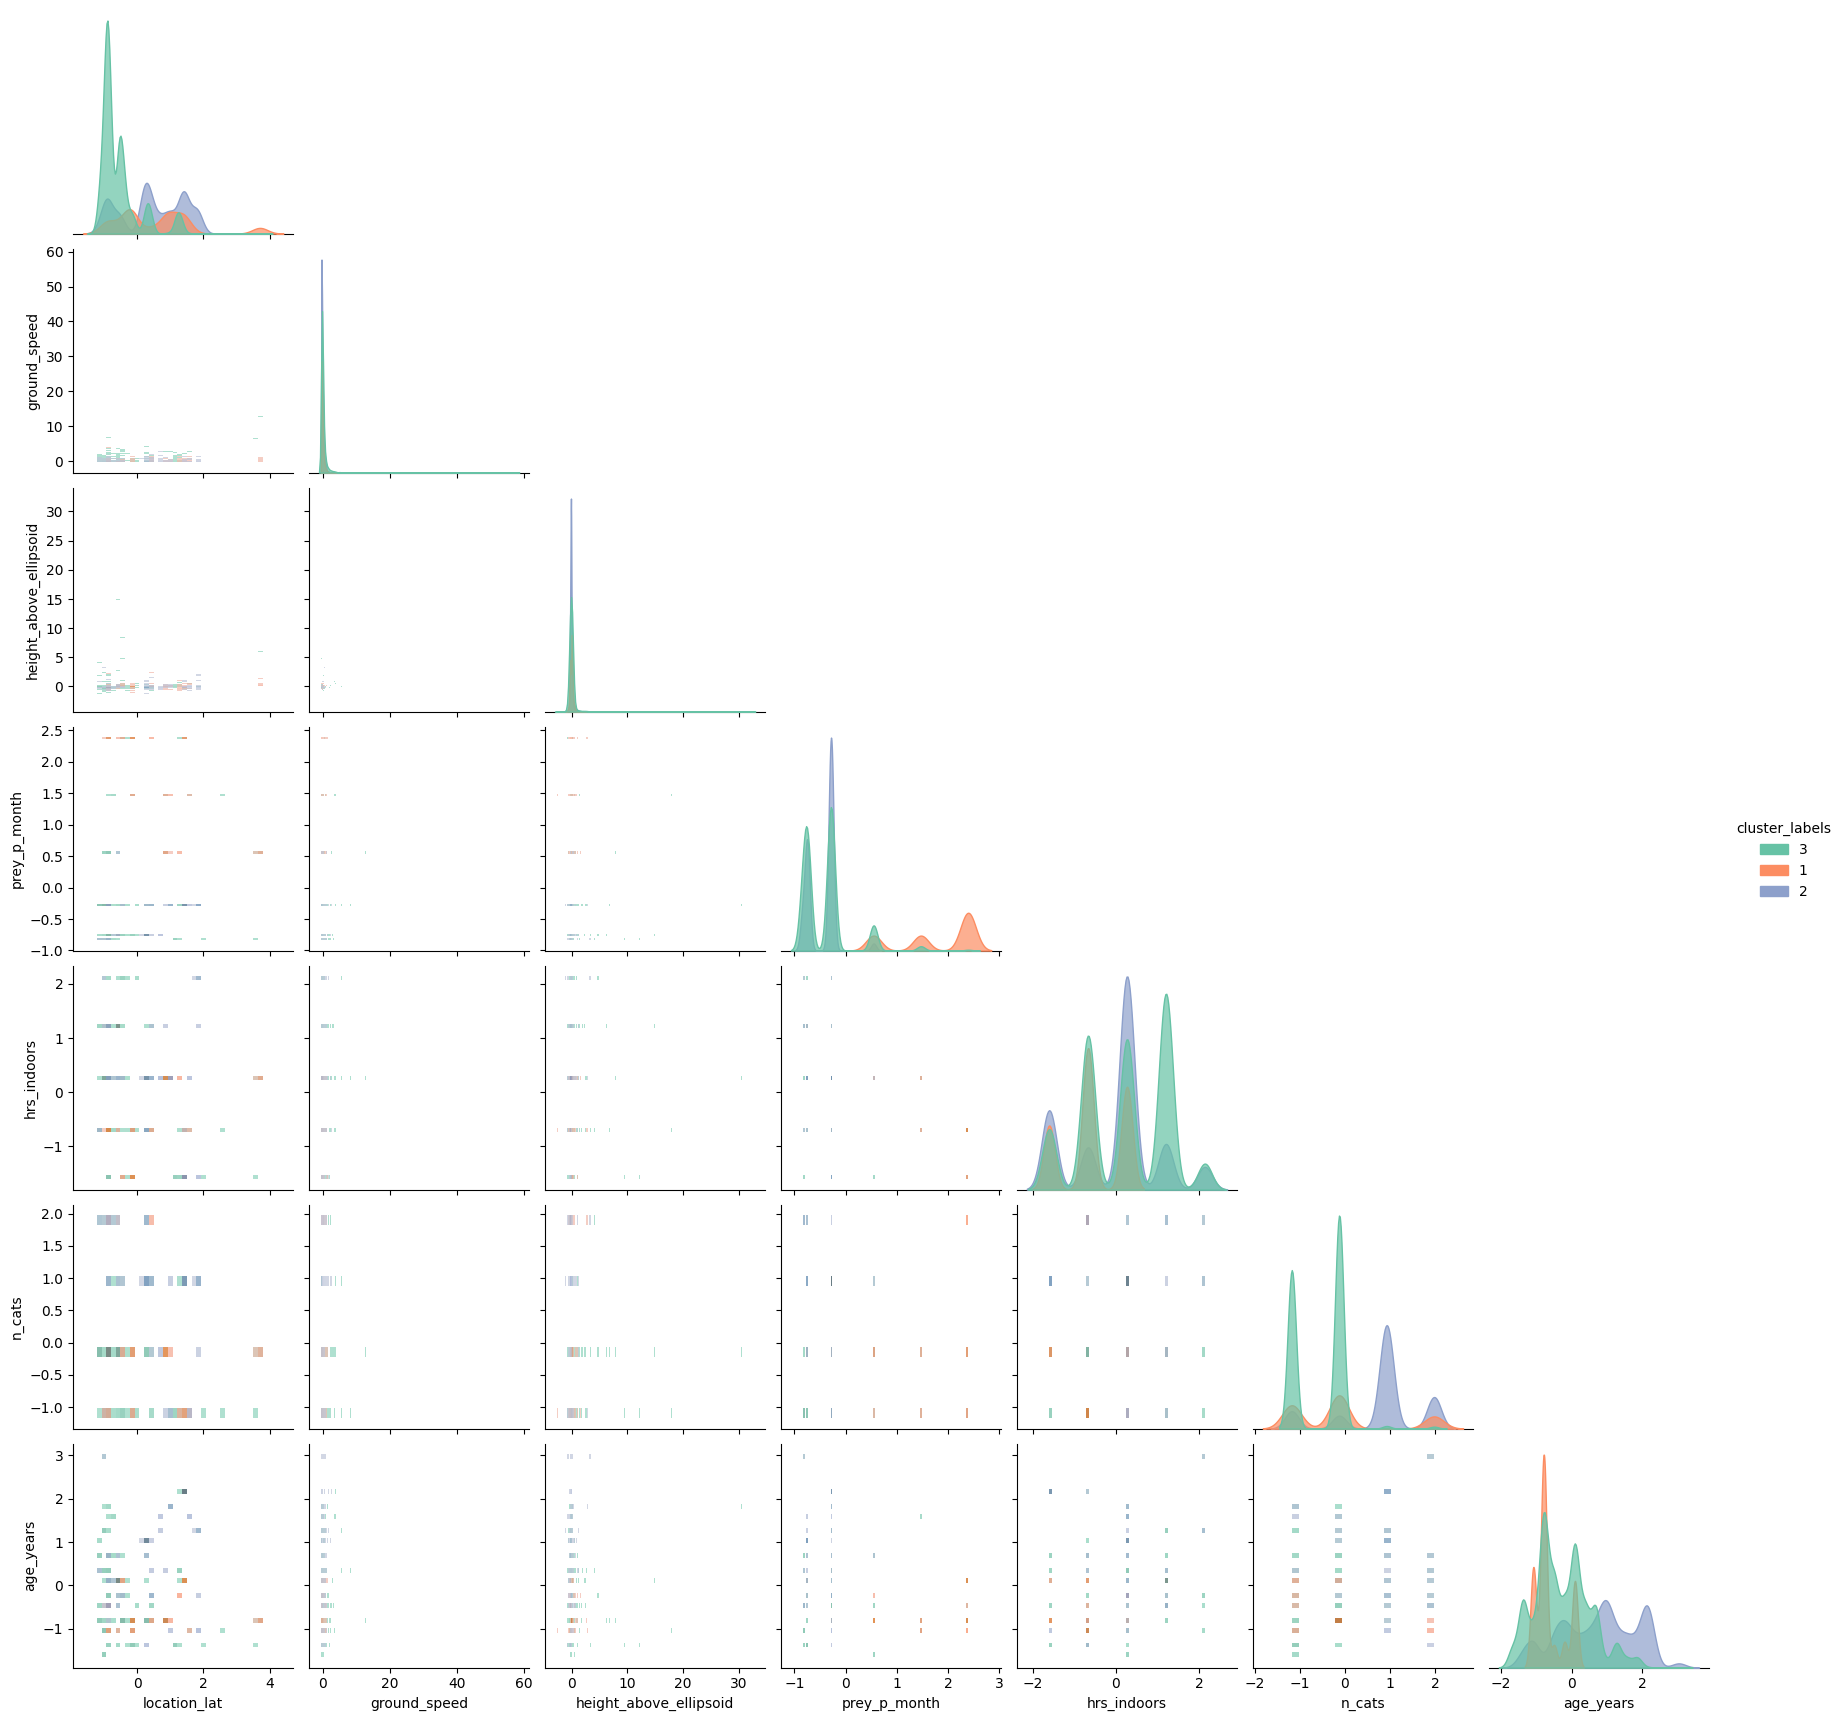

In [ ]:
sns.pairplot(numeric_cats_scaled, kind="hist", diag_kind="kde", corner=True, hue="cluster_labels", palette="Set2",
    plot_kws={'alpha': 0.7},
    diag_kws={'alpha': 0.7}
    )

Using the hierarchical clustering method, the pairplot still shows substantial overlap among clusters, indicating that the separation is not visually clear. The clusters appear to be differentiated primarily by behavioral variables, with hours spent indoors and prey captured per month having the greatest influence on cluster separation.

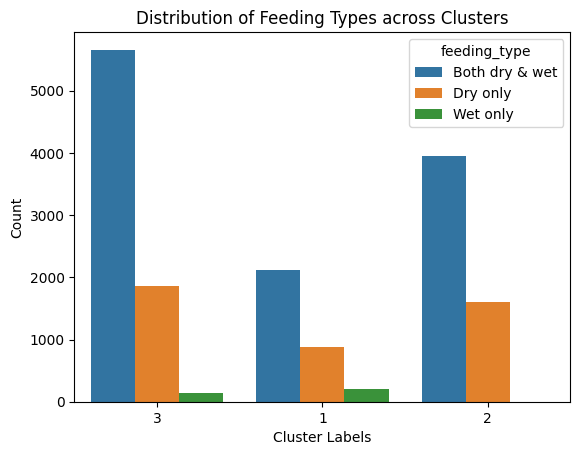

In [ ]:


def get_feeding_type(row):
    if row['food_dry'] and not row['food_wet']:
        return 'Dry only'
    elif not row['food_dry'] and row['food_wet']:
        return 'Wet only'
    elif row['food_dry'] and row['food_wet']:
        return 'Both dry & wet'

if 'feeding_type' not in cleaned_cats_data.columns:
    cleaned_cats_data['feeding_type'] = cleaned_cats_data.apply(get_feeding_type, axis=1)


plot_df = pd.DataFrame({
    'cluster_labels': numeric_cats_scaled['cluster_labels'],
    'feeding_type': cleaned_cats_data['feeding_type']
})

sns.countplot(
    data=plot_df,
    x='cluster_labels',
    hue='feeding_type'
)
plt.title('Distribution of Feeding Types across Clusters')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.show()

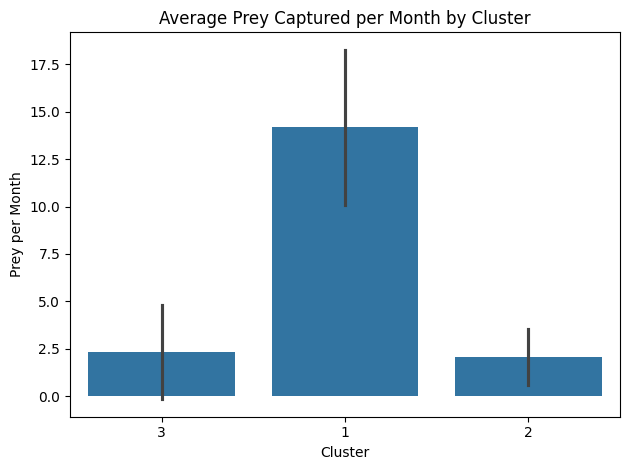

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


cleaned_cats_data['cluster'] = numeric_cats_scaled['cluster_labels']

sns.barplot(
    data=cleaned_cats_data,
    x='cluster',
    y='prey_p_month',
    errorbar='sd'
)

plt.title("Average Prey Captured per Month by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Prey per Month")
plt.tight_layout()
plt.show()

Feeding type is not evenly distributed across clusters

Feeding type alone does not create the clusters

Cluster 3 that dominated by mixed food have substantially lower hunting behavior.
Mixed food provision is assiocated with hunting activities, but do not stop cat's hunting behavior completely.

###K-mean

In [ ]:
sc = StandardScaler()
cat_normalized = numeric_cats_scaled.drop('cluster_labels', axis=1)
cat_normalized = pd.DataFrame(sc.fit_transform(cat_normalized), columns=cat_normalized.columns)

cat_normalized

,location_lat,ground_speed,height_above_ellipsoid,prey_p_month,hrs_indoors,n_cats,age_years
0,-0.800665,-0.327234,-0.109152,-0.285997,-0.670513,-0.125306,-0.782973
1,-0.800788,-0.228792,-0.138812,-0.285997,-0.670513,-0.125306,-0.782973
2,-0.801433,-0.342379,-0.157402,-0.285997,-0.670513,-0.125306,-0.782973
3,-0.801478,-0.402959,-0.119286,-0.285997,-0.670513,-0.125306,-0.782973
4,-0.800620,-0.236365,-0.146684,-0.285997,-0.670513,-0.125306,-0.782973
...,...,...,...,...,...,...,...
16393,3.709172,-0.137923,0.150494,0.544821,0.265955,-0.125306,-0.782973
16394,3.708972,3.042508,0.119080,0.544821,0.265955,-0.125306,-0.782973
16395,3.709933,0.543598,0.214060,0.544821,0.265955,-0.125306,-0.782973
16396,3.709636,-0.183357,0.287488,0.544821,0.265955,-0.125306,-0.782973


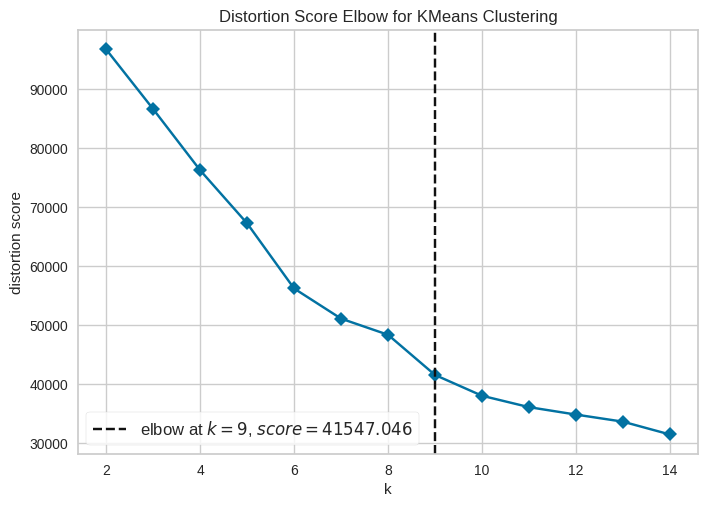

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42, n_init='auto')


visualizer = KElbowVisualizer(
    clustering, k=(2, 15), metric='distortion', timings=False, random_state=42
)

visualizer.fit(cat_normalized)
visualizer.show()

the graph shows k over 9 have more compact clusters, but

In [ ]:
n_clusters_kmeans = 3

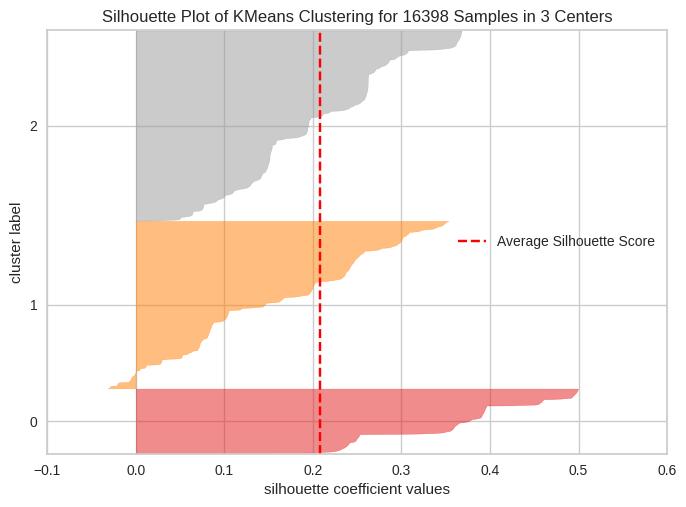

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 16398 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(cat_normalized)
visualizer.show()

In [ ]:
n_clusters_kmeans = 6

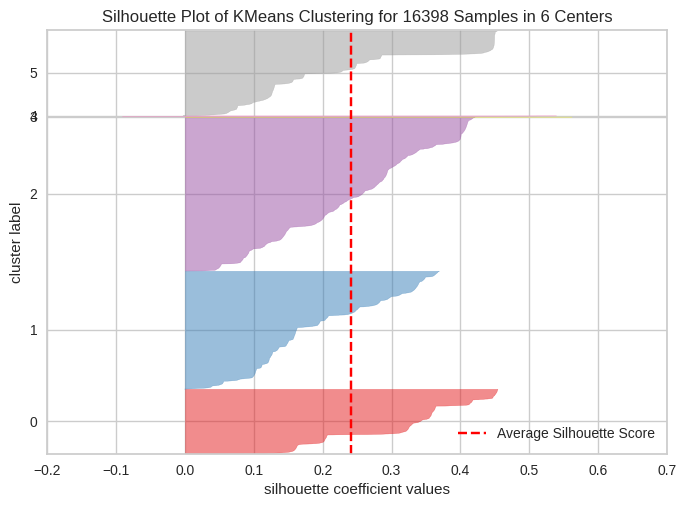

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 16398 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(cat_normalized)
visualizer.show()

In [ ]:
n_clusters_kmeans = 10

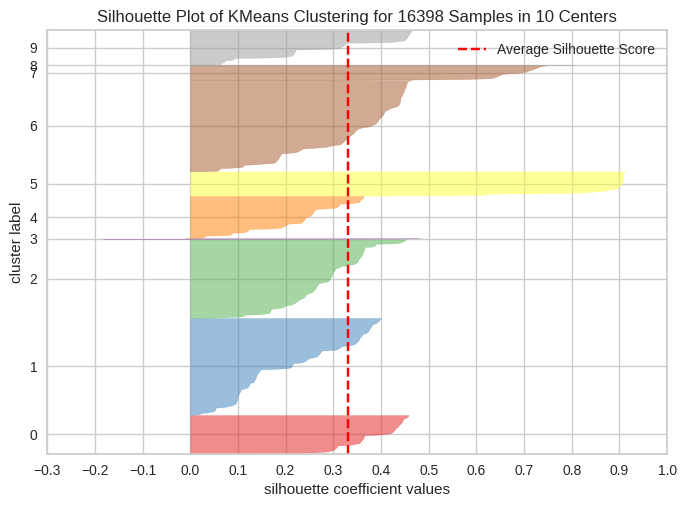

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 16398 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(cat_normalized)
visualizer.show()

Although k = 10 and k = 6 yield higher average silhouette values and do not contain negative silhouette values, they produce several very small clusters, indicating potential over-segmentation. Such fragmentation is not desirable for this research, as it reduces interpretability and analytical usefulness. While k = 3 includes some negative silhouette values, the resulting clusters are more balanced in size and reasonably well separated. Therefore, k = 3 is considered the most appropriate and interpretable choice in this context.

In [ ]:

kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(cat_normalized)

cat_normalized['cluster'] = kmeans_labels
print(pd.Series(kmeans_labels).value_counts())

1    8707
2    5173
0    2518
Name: count, dtype: int64


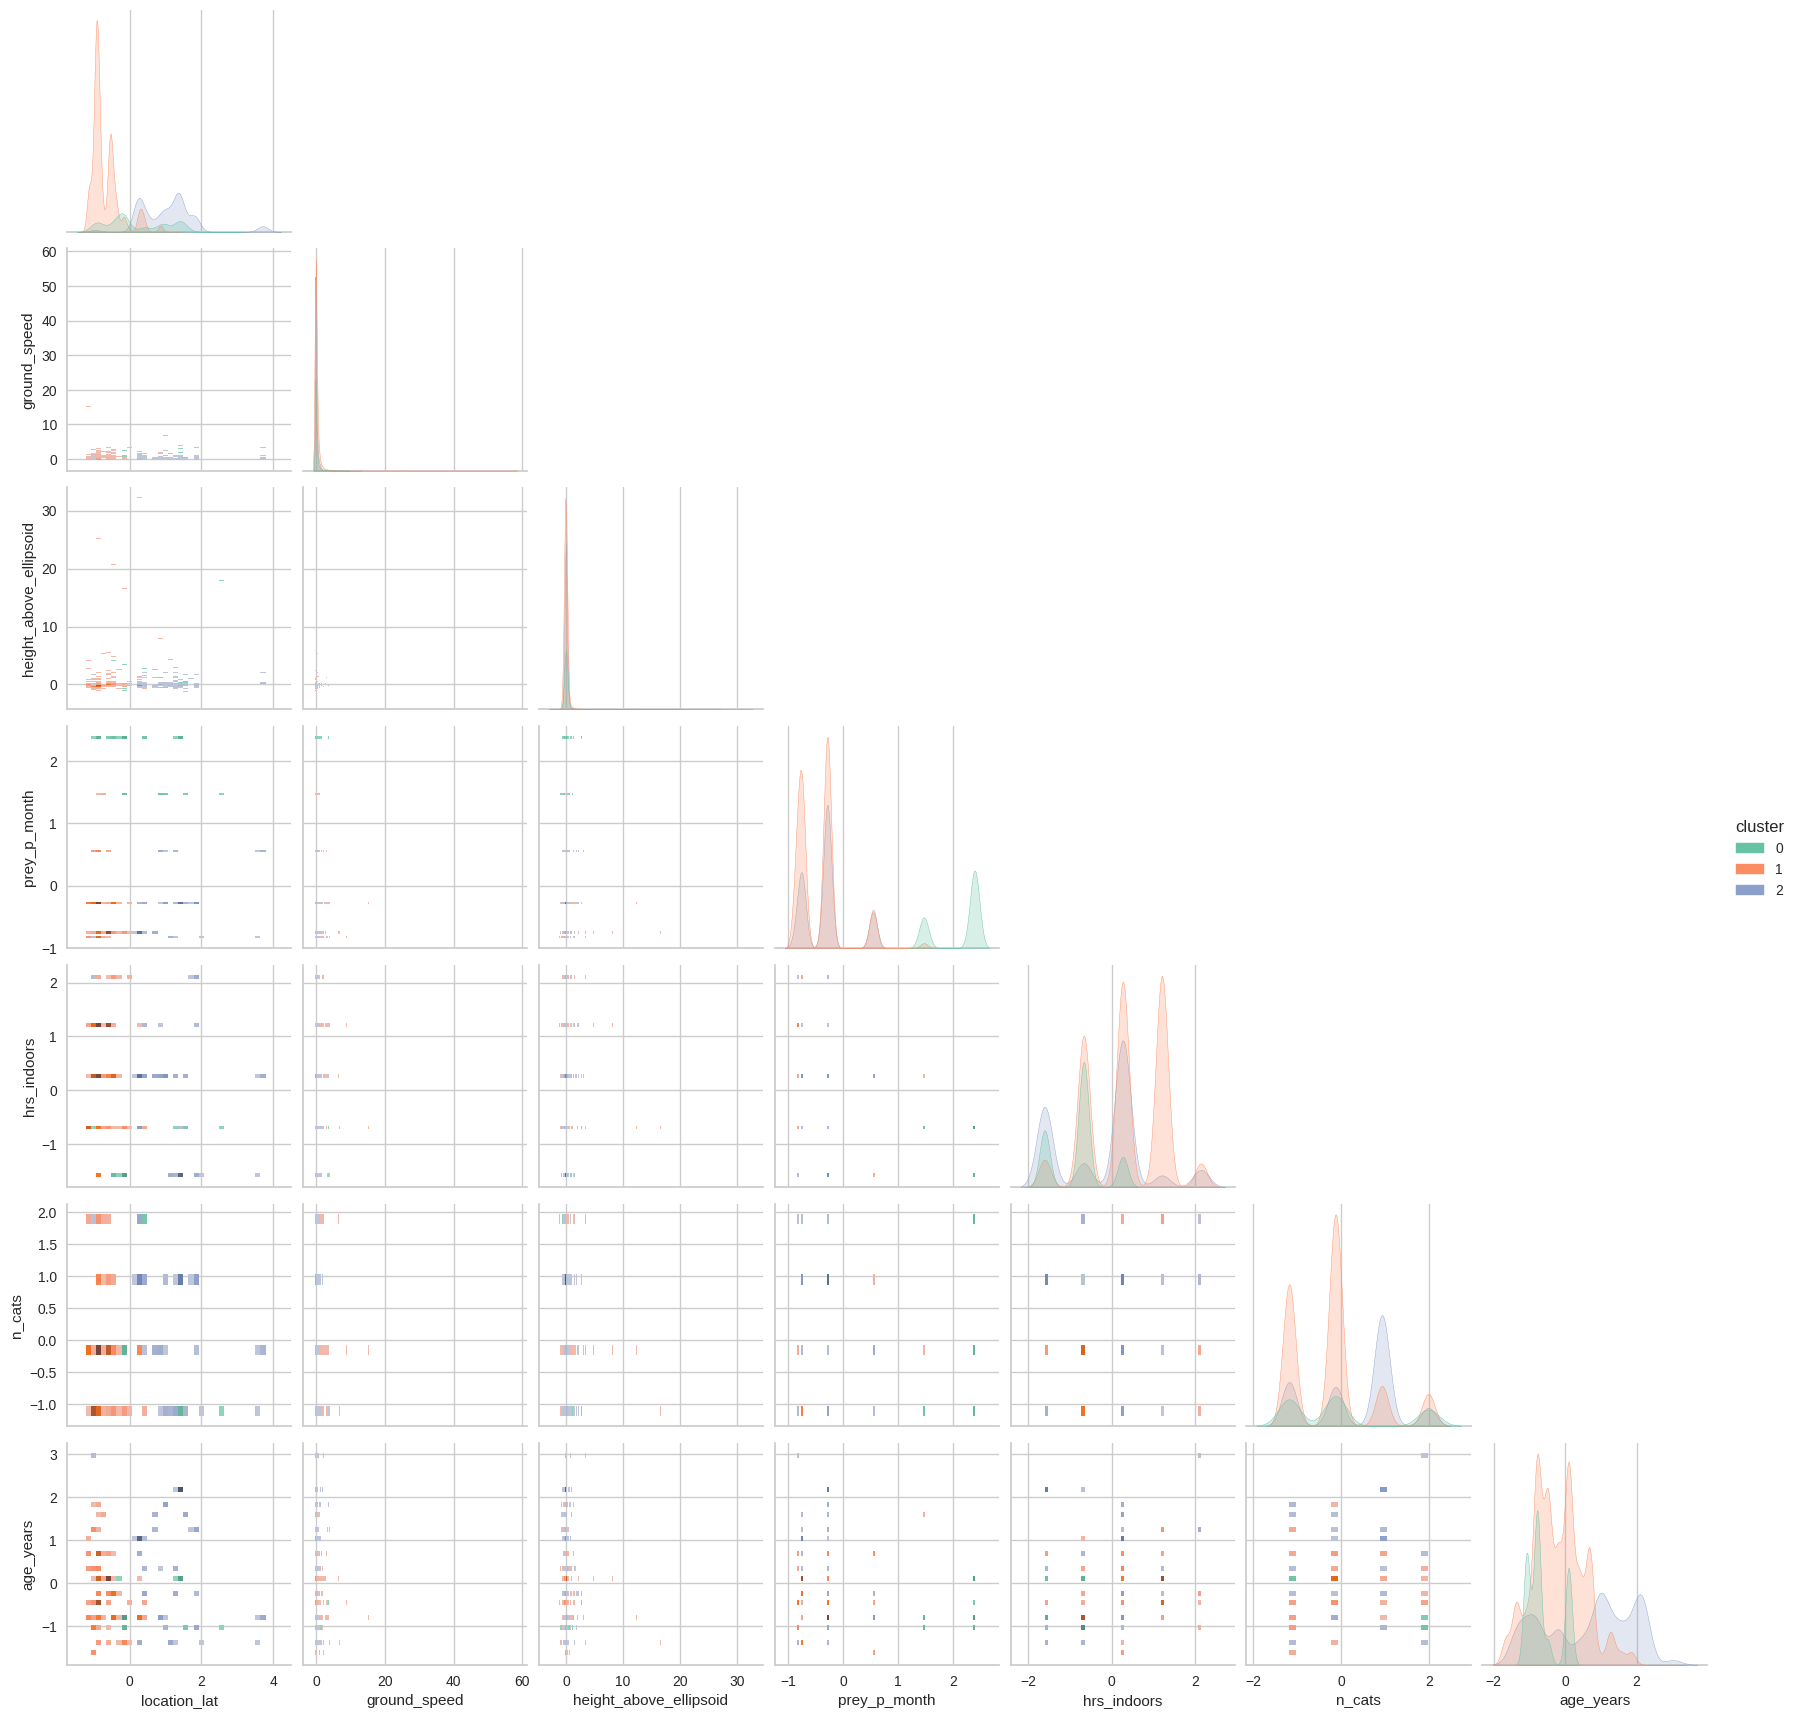

In [ ]:
cat_normalized['cluster'] = kmeans_labels
sns.pairplot(cat_normalized, kind="hist", diag_kind="kde", corner=True, hue="cluster", palette="Set2")

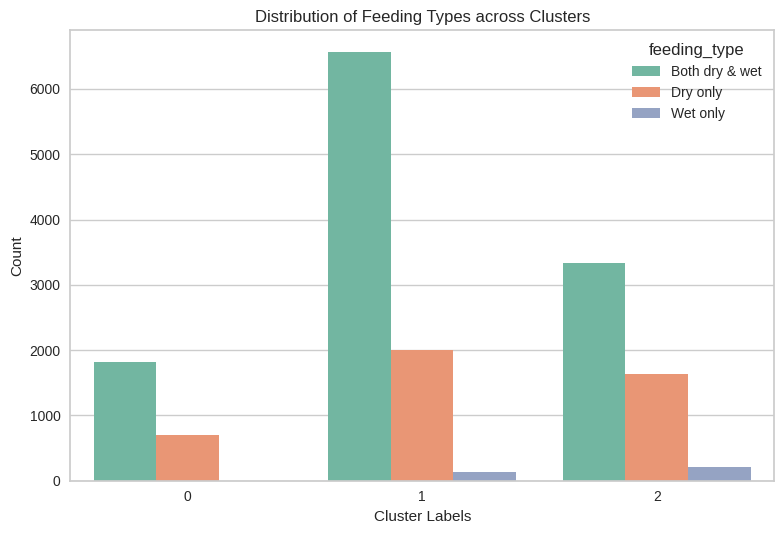

In [ ]:
def get_feeding_type(row):
    if row['food_dry'] and not row['food_wet']:
        return 'Dry only'
    elif not row['food_dry'] and row['food_wet']:
        return 'Wet only'
    elif row['food_dry'] and row['food_wet']:
        return 'Both dry & wet'
    else:
        return 'Other only'

if 'feeding_type' not in cleaned_cats_data.columns:
    cleaned_cats_data['feeding_type'] = cleaned_cats_data.apply(get_feeding_type, axis=1)


plot_df = pd.DataFrame({
    'cluster_labels': kmeans_labels,
    'feeding_type': cleaned_cats_data['feeding_type']
})


sns.countplot(
    data=plot_df,
    x='cluster_labels',
    hue='feeding_type',
    palette='Set2'
)
plt.title("Distribution of Feeding Types across Clusters")
plt.xlabel("Cluster Labels")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot

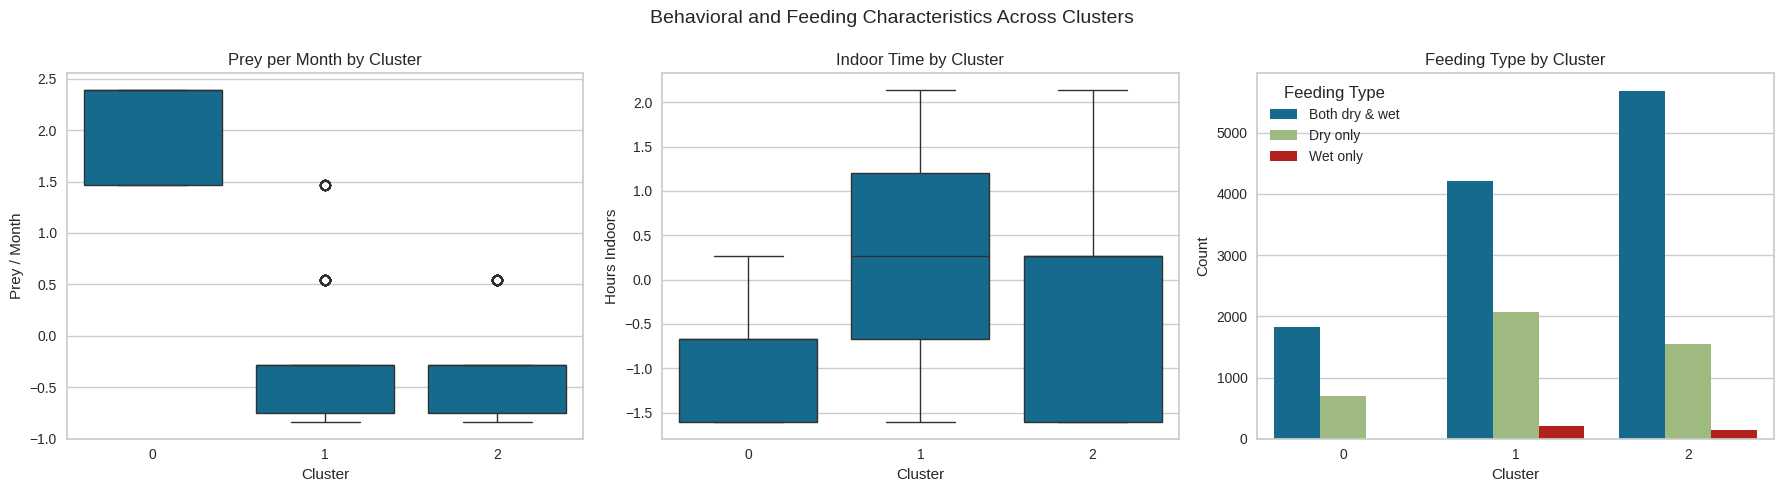

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

sns.boxplot(
    data=cat_normalized,
    x='cluster',
    y='prey_p_month',
    ax=axes[0]
)
axes[0].set_title('Prey per Month by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Prey / Month')

sns.boxplot(
    data=cat_normalized,
    x='cluster',
    y='hrs_indoors',
    ax=axes[1]
)
axes[1].set_title('Indoor Time by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Hours Indoors')

sns.countplot(
    data=cleaned_cats_data,
    x='cluster',
    hue='feeding_type',
    ax=axes[2]
)
axes[2].set_title('Feeding Type by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Count')
axes[2].legend(title='Feeding Type')

plt.suptitle('Behavioral and Feeding Characteristics Across Clusters', fontsize=14)
plt.tight_layout()
plt.show()